<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/PCA_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA - Country Dataset


## About DataSet:
www.kaggle.com%2Fcode%2Fabdelrahmansoltan98%2Fcountry-selection-for-help-international%2Fdata
### Here we use data from kaggle


*   child_mort: Death of children under 5 years of age per 1000 live births

*   exports: Exports of goods and services per capita. Given as %age of the GDP per capita

*   health: Total health spending per capita. Given as %age of GDP per capita

*   imports: Imports of goods and services per capita. Given as %age of the GDP per capita
*   Income: Net income per person

*   Inflation: The measurement of the annual growth rate of the Total GDP

*   life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

*   total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.

*   gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


















## Import Liberaries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Get Dataset

In [3]:
df=pd.read_csv('Country-data.csv')

##EDA

In [4]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
df=df.drop('country', axis = 1)

In [6]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
df.dtypes.value_counts()

float64    7
int64      2
dtype: int64

In [ ]:
df.shape

(167, 9)

## Visualization

<Figure size 1200x600 with 0 Axes>

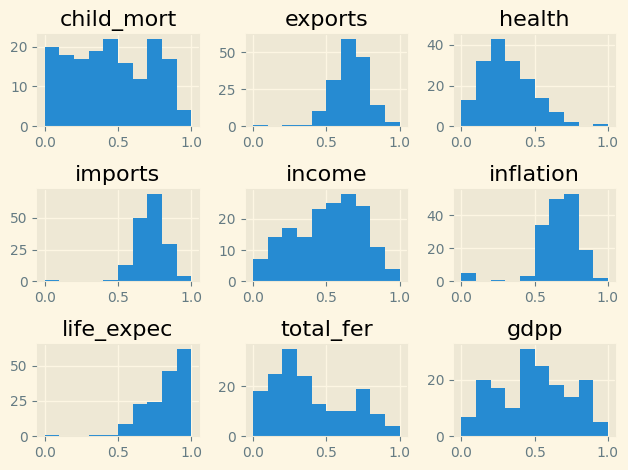

In [34]:
plt.figure(figsize=(8,4),dpi=150)
plt.style.use('Solarize_Light2')
df.hist(grid=True)
plt.tight_layout()
plt.show()

## About Skewness:
skewness refers to the direction and relative magnitude of a histogram's tail. Skewness can be "positive/right" where the tail extends more to the right, or "negative/left" where the tail extends more to the left. A distribution that is symmetric will have no skewness.
## Here's an assessment of the skewness in each graph based on the visual:


*   child_mort: The distribution is positively skewed (right-skewed), as the tail extends towards higher child mortality rates, with a concentration of countries having lower rates.
*   exports: This histogram also exhibits positive skewness, with most countries having lower export values and a tail extending to the right towards higher values.

*   health: Again, this histogram shows positive skewness with the majority of countries spending a lower percentage of GDP on health and fewer countries with very high health spending.

*   imports: This is positively skewed, with most countries clustered at lower import values and the tail stretching to higher values.

*   income: The income distribution is highly positively skewed, with a significant concentration of countries at the lower end of the income spectrum and a long tail to the right.
*   inflation: This histogram has a positive skewness, indicating most countries have lower inflation rates, with a few exceptions having very high inflation rates.

*   life_expec: The life expectancy histogram appears to be slightly negatively skewed (left-skewed), with the tail extending towards the lower life expectancy and the bulk of the countries having higher life expectancy.



*   total_fer: This histogram is positively skewed, with most countries having lower fertility rates and fewer countries with higher rates.

*   gdpp: The Gross Domestic Product per capita histogram shows a very pronounced positive skew, with most countries having lower GDP per capita and a long tail that includes countries with very high GDP per capita.




## How to address right/left skewed data?
It is possible to use different methods to address both right and left skewed data. Each type of skewness might benefit from a different approach:

### Right-Skewed Data (Positive Skewness): For data that is skewed to the right, transformations are typically used that compress the long tail on the right side. The common methods include:

*   Log Transformation: Used when data contains only positive values. It's very effective for reducing right skewness.

*   Square Root Transformation: Also used for positive values, especially if there are zero values in the data, which cannot be log-transformed.

### Left-Skewed Data (Negative Skewness): For data that is skewed to the left, transformations typically spread out the concentration of data on the left side. These might include:

*   Square/Cube Transformation: Raising the data to the power of 2 or 3 can help in reducing left skewness.

*   Reflect and Transform: Sometimes, it might be useful to first reflect the data (multiply by -1) to turn it into right-skewed data, apply a transformation appropriate for right skewness, and then reflect it back.

### Here we use Log Transformation


## Transform Skewed Features

In [15]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[df.columns].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
inflation,5.154049
exports,2.445824
income,2.231480
gdpp,2.218051
imports,1.905276
child_mort,1.450774
total_fer,0.967092
life_expec,-0.970996


In [16]:
for col in skew_cols.index.values:
    df[col] = df[col].apply(np.log1p)

<Figure size 1200x600 with 0 Axes>

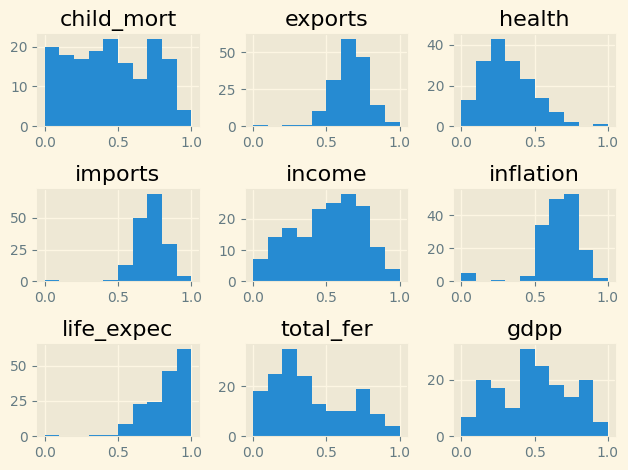

In [35]:
plt.figure(figsize=(8,4),dpi=150)
df.hist()
plt.tight_layout()

## Heat Map

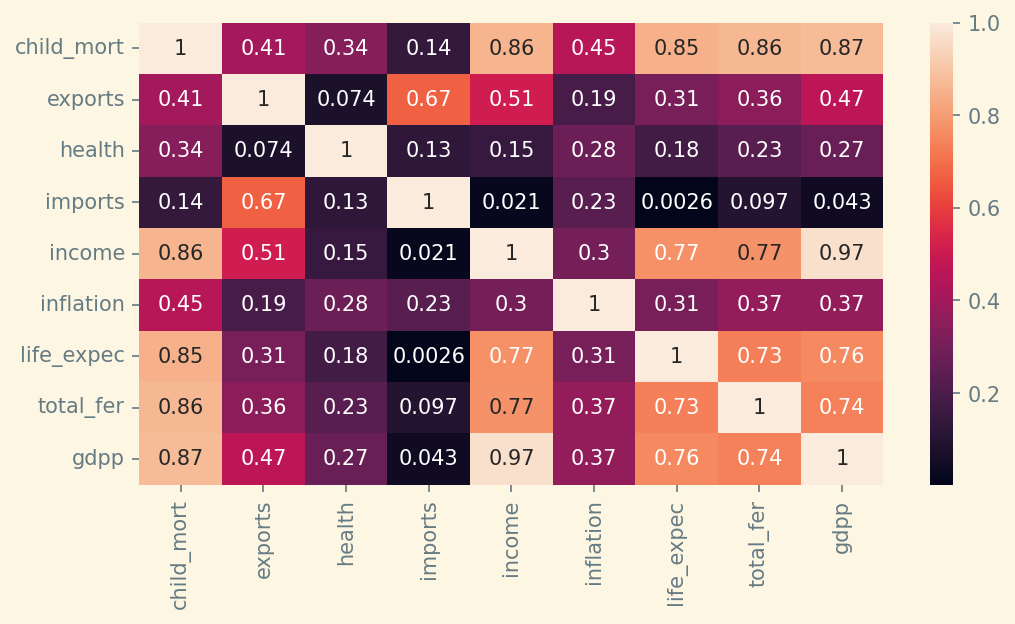

In [36]:
plt.figure(figsize=(8,4),dpi=150)
corr_mat = df.corr()
sns.heatmap(corr_mat.abs(), annot=True)
plt.show()

## About Correlation Matrix:

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation (close to 1 or -1), it means that when one variable changes, the other variable tends to change in a specific direction consistently. If the correlation is close to 0, it means that there is no linear relationship between the variables.

According to the heatmap:


*   child_mort (child mortality) has a strong positive correlation with total_fer (total fertility rate) and gdpp (likely GDP per capita), suggesting that higher child mortality rates tend to occur in countries with higher fertility rates and lower GDP per capita.

*   income shows a strong negative correlation with child_mort and total_fer, indicating that higher income levels are associated with lower child mortality rates and lower fertility rates.

*   life_expec (life expectancy) has a strong negative correlation with child_mort and total_fer, and a strong positive correlation with income, suggesting that as life expectancy increases, child mortality and fertility rates tend to decrease, and income tends to increase.
*   gdpp also shows similar patterns of correlation as income, reinforcing the relationship between economic prosperity and health/demographic indicators.









In [20]:
# Strip out the diagonal values for the next step
for x in range(len(df.columns)):
    corr_mat.iloc[x,x] = 0.0

In [ ]:
corr_mat.abs().idxmax()

child_mort          gdpp
exports          imports
health         inflation
imports          exports
income              gdpp
inflation     child_mort
life_expec    child_mort
total_fer     child_mort
gdpp              income
dtype: object

## Scale Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mms = MinMaxScaler()

In [23]:
for col in df.columns:
    df[col] = mms.fit_transform(df[[col]]).squeeze()

In [ ]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     4
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Clean Data

In [24]:
df.fillna(0, inplace=True)

In [25]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca=PCA()

In [29]:
df_pca=pca.fit_transform(df)

## In PCA, the goal is to reduce the dimensionality of a dataset by finding a set of new orthogonal axes (principal components) along which the data varies the most. These principal components are ranked in order of importance, with the first component explaining the most variance, the second component explaining the second most, and so on.

### pca.explained_variance_ratio_
is an array-like object that provides the explained variance ratio for each of these principal components. Each element of the array represents the proportion of the total variance explained by the corresponding principal component. The array is sorted in descending order, so the first element corresponds to the first principal component, the second element to the second principal component, and so on.

In [30]:
print(pca.explained_variance_ratio_)

[0.70171941 0.09089271 0.06273332 0.05832449 0.04411691 0.02443946
 0.01020754 0.00552153 0.00204463]


In [31]:
print(np.round(pca.explained_variance_ratio_ * 100, 2))

[70.17  9.09  6.27  5.83  4.41  2.44  1.02  0.55  0.2 ]


## The singular_values array will contain the singular values of the data matrix after PCA. These values are often used to compute the explained variance, which is important for understanding the amount of variance captured by each principal component. The larger the singular value, the more variance is explained by the corresponding principal component.

In [32]:
print(pca.singular_values_)

[6.41667132 2.30936496 1.91856793 1.84992243 1.6089058  1.19749539
 0.77390683 0.56919075 0.34636572]


## Elbow Plot

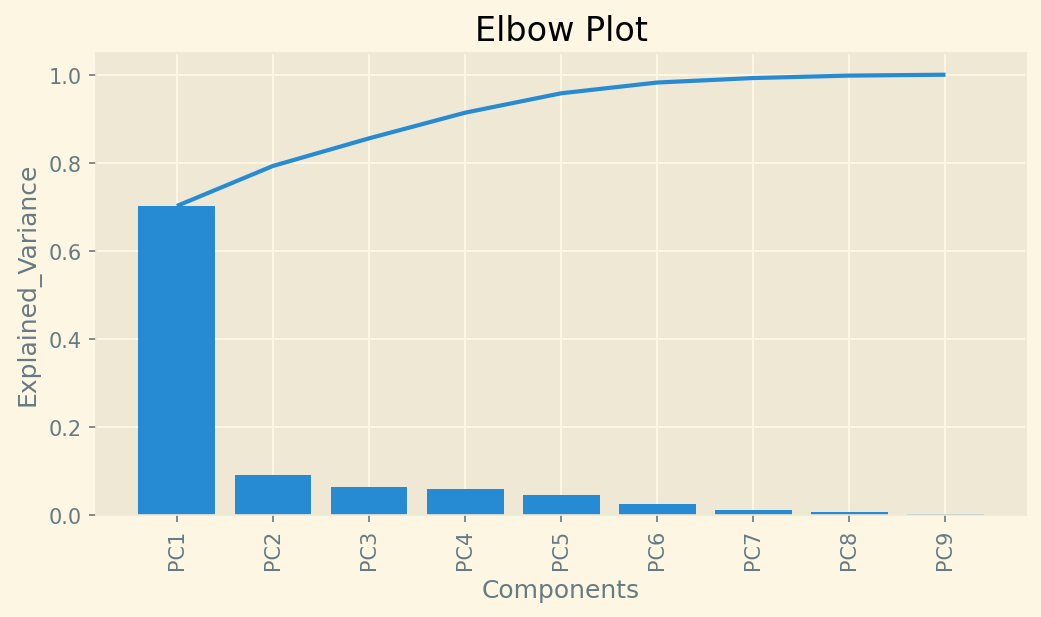

In [39]:
plt.figure(figsize=(8,4),dpi=150)
PC_list = ['PC'+str(i+1) for i in range(9)]
plt.bar(PC_list, pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('Elbow Plot')
plt.xlabel('Components')
plt.ylabel('Explained_Variance')
plt.xticks(rotation=90)
plt.show()

In [40]:
print('explained var with first PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[0] * 100, 2))
print('explained var with first 2 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[1] * 100, 2))
print('explained var with first 3 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[2] * 100, 2))
print('explained var with first 4 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[3] * 100, 2))
print('explained var with first 5 PC: ', np.round(np.cumsum(pca.explained_variance_ratio_ )[4] * 100, 2))

explained var with first PC:  70.17
explained var with first 2 PC:  79.26
explained var with first 3 PC:  85.53
explained var with first 4 PC:  91.37
explained var with first 5 PC:  95.78


## From this plot, we can observe that the first principal component (PC1) explains a significant amount of variance (70.17%) compared to the subsequent components. After PC1, the additional components explain progressively less variance, with a very sharp decline from PC1 to PC2(9.09%). The "elbow" of this plot would likely be at PC1, indicating that most of the useful information is captured in the first principal component.

In [41]:
total_var = np.cumsum(pca.explained_variance_ratio_) * 100

for i in range(9):
    print("PC {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

PC  1, explained var: 70.17
PC  2, explained var: 79.26
PC  3, explained var: 85.53
PC  4, explained var: 91.37
PC  5, explained var: 95.78
PC  6, explained var: 98.22
PC  7, explained var: 99.24
PC  8, explained var: 99.80
PC  9, explained var: 100.00


## PCA with 2 Components

In [45]:
X = np.array(df)

In [48]:
pca_2 = PCA(n_components=2, random_state=42)

In [49]:
pca_2.fit(X)

PCA(n_components=2, random_state=42)

In [50]:
print(pca_2.explained_variance_ratio_)

[0.70171941 0.09089271]


In [51]:
print(np.round(pca_2.explained_variance_ratio_ * 100, 2))

[70.17  9.09]


In [52]:
X_2PC = pca_2.transform(X)

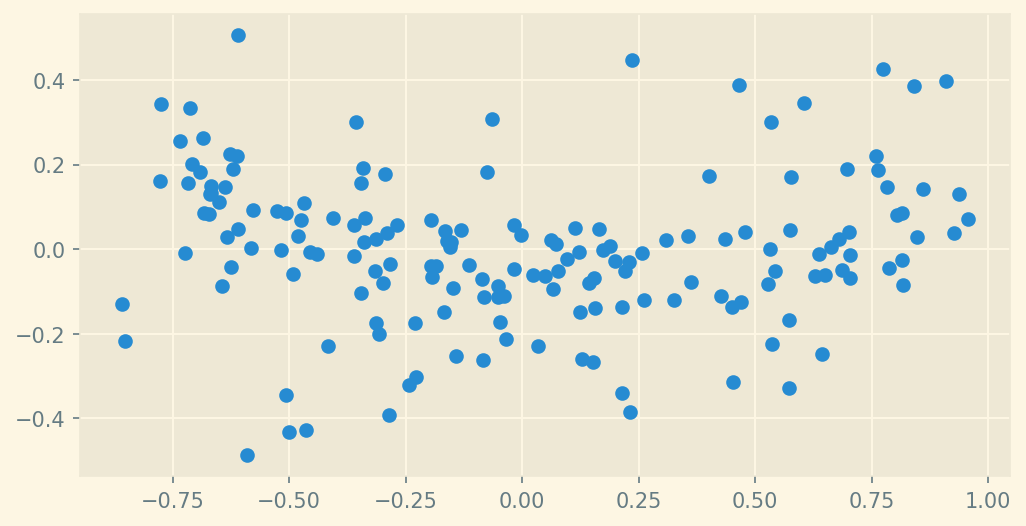

In [54]:
plt.figure(figsize=(8,4),dpi=150)
plt.scatter(X_2PC[:,0], X_2PC[:,1])
plt.show()

## Conclusion:


*   Spread of Data Points: The scatter plot displays how the data points are spread along the first two principal components (PC1 and PC2). These are the new axes after the PCA transformation.

*   Variance Captured: The first principal component (x-axis) seems to capture more variance than the second principal component (y-axis) since the spread of points is wider along the x-axis. This is typical for PCA since the components are sorted by the amount of variance they capture.

*   No Clear Clustering: There doesn't appear to be distinct clusters or groupings of the data points, which would indicate distinct subgroups within the data. The points are somewhat evenly scattered, which suggests that there may not be distinct, separated categories within this dataset based on the first two principal components.

*   Potential Outliers: If any points were far removed from the others, they could be considered outliers. However, in this plot, no clear outliers are visible.

*   Linear Correlation: There doesn't seem to be a clear linear correlation between the first and second principal components; the points do not form a line or curve but are rather dispersed. This lack of correlation is expected since PCA specifically seeks to remove correlation between components.

*   Complexity of the Data: If the original data had more than two dimensions, this plot shows that the complexity has been reduced to two dimensions. This simplification can make it easier to visualize and understand the data, but it may also mean that some information is lost.

*   Suitability for Further Analysis: The spread of points along the principal components can be used for further analysis, such as clustering algorithms, if clusters were less subtle, or it can be used as input for classifiers in a machine learning pipeline.

*   Noisy Data: The somewhat uniform scatter of points might also suggest that the data has noise. The PCA has highlighted this by showing that the data points do not aggregate around certain areas or along specific axes.















